In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
#from scipy import stats

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-data/housingData_7R.xlsx


In [2]:
#pd.set_option('display.max_rows', 20)

In [3]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 287 kB/s            


In [4]:
data = pd.read_excel("/kaggle/input/housing-data/housingData_7R.xlsx")

In [5]:
#data = df.copy()

In [6]:
df = data.copy()

In [7]:
#data = df.copy()

In [8]:
data.head()

,Unnamed: 0,adID,adDealType,adCanton,adZipCode,adCity,adPublishedDate,adAvailableDate,adPriceText,adDescription,adLangDetected,adNumRooms,adFloor,adYearOfConstruction,adNumApartments,adFloor.1,adNumApartments.1,adLivingSpace,adBuildingArea,adUsefulArea,adCoordE,adCoordN
0,0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130
1,1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843
2,2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906
3,3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595
4,4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414


In [9]:
data.shape

(582669, 22)

In [10]:
data.columns

Index(['Unnamed: 0', 'adID', 'adDealType', 'adCanton', 'adZipCode', 'adCity',
       'adPublishedDate', 'adAvailableDate', 'adPriceText', 'adDescription',
       'adLangDetected', 'adNumRooms', 'adFloor', 'adYearOfConstruction',
       'adNumApartments', 'adFloor.1', 'adNumApartments.1', 'adLivingSpace',
       'adBuildingArea', 'adUsefulArea', 'adCoordE', 'adCoordN'],
      dtype='object')

In [11]:
data = data.drop('Unnamed: 0', axis = 1)

In [12]:
data.describe(include = "all")

,adID,adDealType,adCanton,adZipCode,adCity,adPublishedDate,adAvailableDate,adPriceText,adDescription,adLangDetected,adNumRooms,adFloor,adYearOfConstruction,adNumApartments,adFloor.1,adNumApartments.1,adLivingSpace,adBuildingArea,adUsefulArea,adCoordE,adCoordN
count,582669,582669.00000,582669,582668.00000,535442,582669,582669,582669,582646,582669,582669,582669,582669,19549.00000,582669,19549.00000,582669,57224,105643,582669.00000,582669.00000
unique,582669,NaN,7,NaN,2148,2135,700,9147,441161,4,100,56,520,NaN,56,NaN,1363,3602,1643,NaN,NaN
top,A1,NaN,ZH,NaN,Zürich,2021-08-13,nach Vereinbarung,On request,None,de,None,not available,not available,NaN,not available,NaN,not available,"1,000",100,NaN,NaN
freq,1,NaN,144098,NaN,36322,10281,234256,27155,15619,295370,109048,273739,369297,NaN,273739,NaN,201091,658,2203,NaN,NaN
mean,NaN,12.78479,NaN,4782.51585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22155,NaN,9.22155,NaN,NaN,NaN,7.84939,46.80437
std,NaN,4.48251,NaN,2821.55953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.42858,NaN,12.42858,NaN,NaN,NaN,2.58816,0.67508
min,NaN,10.00000,NaN,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,0.00000,-141.54182
25%,NaN,10.00000,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,2.00000,NaN,NaN,NaN,7.05056,46.46260
50%,NaN,10.00000,NaN,4950.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00000,NaN,6.00000,NaN,NaN,NaN,7.95761,46.83534
75%,NaN,20.00000,NaN,6987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,12.00000,NaN,NaN,NaN,8.65123,47.26299


In [13]:
data['adDescription'].head()

0    Appartement avec beaucoup de charme à louer à ...
1    Die Highlights:<br />» Gut geschnittener Büror...
2    Für diese Wohnung suchen wir ein nettes Paar (...
3    <h3>Chiasso</h3><p><p>Si affitta in pieno a ce...
4    Attico mansardato, posto in elegante palazzina...
Name: adDescription, dtype: object

In [14]:
data['adDealType'].value_counts()

10    420408
20    162261
Name: adDealType, dtype: int64

In [15]:
data['Deal_Type'] = data['adDealType'].copy()

In [16]:
target_map = {
    10: 'rental',
    20: 'sell'}

data.Deal_Type.replace(target_map, inplace = True)

In [17]:
data['Deal_Type'].head()

0    rental
1    rental
2    rental
3    rental
4      sell
Name: Deal_Type, dtype: object

In [18]:
data.columns

Index(['adID', 'adDealType', 'adCanton', 'adZipCode', 'adCity',
       'adPublishedDate', 'adAvailableDate', 'adPriceText', 'adDescription',
       'adLangDetected', 'adNumRooms', 'adFloor', 'adYearOfConstruction',
       'adNumApartments', 'adFloor.1', 'adNumApartments.1', 'adLivingSpace',
       'adBuildingArea', 'adUsefulArea', 'adCoordE', 'adCoordN', 'Deal_Type'],
      dtype='object')

In [19]:
len(data.columns)

22

In [20]:
original_col = data.columns

new_col = ['ID', 'DealType', 'Canton', 'ZipCode',
           'City','PublishedDate', 'AvailableDate', 'PriceText', 
           'Description', 'LangDetected', 'NumRooms', 'Floor', 
           'YearOfConstruction', 'NumApartments', 'Floor1', 
           'NumApartments1', 'LivingSpace', 'BuildingArea', 
           'UsefulArea', 'CoordE', 'CoordN' ,'Deal_Type']

data = data.rename(columns=dict(zip(original_col,new_col)))

data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,NumApartments,Floor1,NumApartments1,LivingSpace,BuildingArea,UsefulArea,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414,sell


In [21]:
def percentage_missing(df):    
    pm = (df.isnull().sum()/len(data))*100
    return pm

In [22]:
# replace all column names (in place)
#new_cols = [‘column_x’, ‘column_y’, ‘column_z’]
#df.columns = new_cols

## EDA

In [23]:
data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,NumApartments,Floor1,NumApartments1,LivingSpace,BuildingArea,UsefulArea,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414,sell


In [24]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'NumApartments', 'Floor1',
       'NumApartments1', 'LivingSpace', 'BuildingArea', 'UsefulArea', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

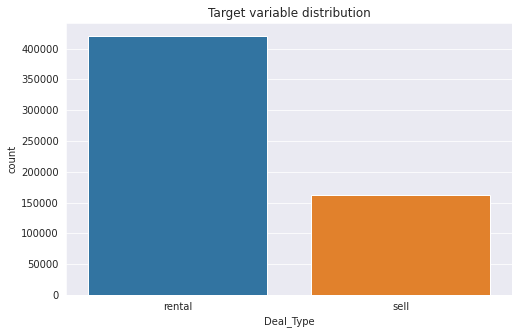

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data['Deal_Type'])
plt.title('Target variable distribution')
plt.show()

In [26]:
data.shape

(582669, 22)

In [27]:
data.isnull().sum().sort_values(ascending = False)

NumApartments         563120
NumApartments1        563120
BuildingArea          525445
UsefulArea            477026
City                   47227
Description               23
ZipCode                    1
ID                         0
CoordN                     0
CoordE                     0
LivingSpace                0
Floor1                     0
Floor                      0
YearOfConstruction         0
DealType                   0
NumRooms                   0
LangDetected               0
PriceText                  0
AvailableDate              0
PublishedDate              0
Canton                     0
Deal_Type                  0
dtype: int64

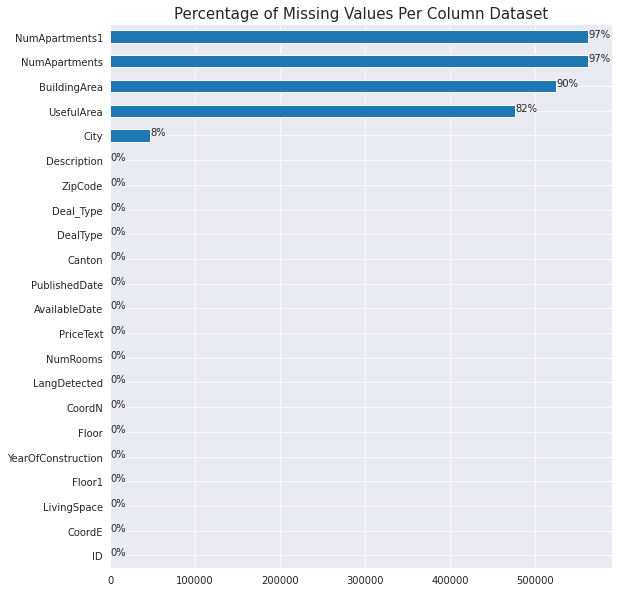

In [28]:
#Plot missing values in data
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [29]:
#To find the percentage of missing rows in each column
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
NumApartments,563120,96.64492
NumApartments1,563120,96.64492
BuildingArea,525445,90.17899
UsefulArea,477026,81.86912
City,47227,8.10529
Description,23,0.00395
ZipCode,1,0.00017
ID,0,0.00000
CoordN,0,0.00000
CoordE,0,0.00000


## Treating Missing Values and Outliers

In [30]:
data.isnull().sum().sort_values(ascending=False)

NumApartments         563120
NumApartments1        563120
BuildingArea          525445
UsefulArea            477026
City                   47227
Description               23
ZipCode                    1
ID                         0
CoordN                     0
CoordE                     0
LivingSpace                0
Floor1                     0
Floor                      0
YearOfConstruction         0
DealType                   0
NumRooms                   0
LangDetected               0
PriceText                  0
AvailableDate              0
PublishedDate              0
Canton                     0
Deal_Type                  0
dtype: int64

In [31]:
mis_columns = ['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea' ]

In [32]:
data.corr()

,DealType,ZipCode,NumApartments,NumApartments1,CoordE,CoordN
DealType,1.00000,-0.06292,-0.16487,-0.16487,0.00941,-0.27611
ZipCode,-0.06292,1.00000,0.23040,0.23040,0.32383,0.22359
NumApartments,-0.16487,0.23040,1.00000,1.00000,0.22231,-0.03104
NumApartments1,-0.16487,0.23040,1.00000,1.00000,0.22231,-0.03104
CoordE,0.00941,0.32383,0.22231,0.22231,1.00000,-0.57470
CoordN,-0.27611,0.22359,-0.03104,-0.03104,-0.57470,1.00000


In [33]:
data['NumApartments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NumApartments, dtype: float64

In [34]:
data['NumApartments'].value_counts()

1.00000     3112
2.00000     2418
3.00000     1648
6.00000     1622
4.00000     1349
            ... 
93.00000       1
70.00000       1
65.00000       1
99.00000       1
38.00000       1
Name: NumApartments, Length: 74, dtype: int64

In [35]:
mis_columns

['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea']

In [36]:
NumApartments = data['NumApartments'].copy()
BuildingArea = data['BuildingArea'].copy()
UsefulArea = data['UsefulArea'].copy()

In [37]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'NumApartments', 'Floor1',
       'NumApartments1', 'LivingSpace', 'BuildingArea', 'UsefulArea', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [38]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

#sample_outliers = detect_outliers_zscore(data['adNumApartments.1'])
#print("Outliers from Z-scores method: ", sample_outliers)

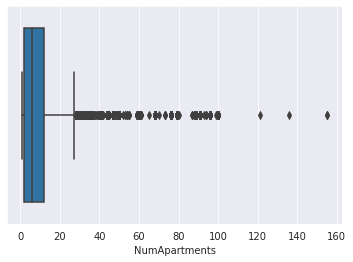

In [39]:
sns.boxplot(data['NumApartments'])
plt.show()

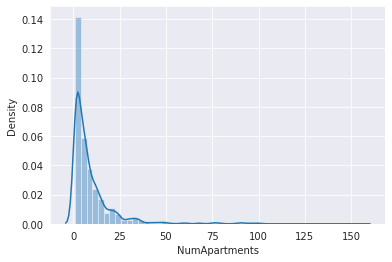

In [40]:
sns.distplot(data['NumApartments'])
plt.show()

In [41]:
data = data.drop(columns = mis_columns, axis = 1)

In [42]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [43]:
data.isnull().sum().any()

True

In [44]:
data.isnull().sum().sort_values(ascending = False)

City                  47227
Description              23
ZipCode                   1
ID                        0
Floor                     0
CoordN                    0
CoordE                    0
LivingSpace               0
Floor1                    0
YearOfConstruction        0
LangDetected              0
NumRooms                  0
DealType                  0
PriceText                 0
AvailableDate             0
PublishedDate             0
Canton                    0
Deal_Type                 0
dtype: int64

In [45]:
data['City'].value_counts()

Zürich               36322
Lausanne             19709
Lugano               16873
Bern                 14397
Luzern               11527
                     ...  
Vouvry                   1
Saicourt                 1
Gresso                   1
Wiler bei Seedorf        1
Wilen b. Wollerau        1
Name: City, Length: 2148, dtype: int64

In [46]:
City = data['City'].copy()

In [47]:
data['City'].describe()

count     535442
unique      2148
top       Zürich
freq       36322
Name: City, dtype: object

In [48]:
data['City'].head()

0      Asuel
1     Zürich
2     Urdorf
3    Chiasso
4     Melano
Name: City, dtype: object

In [49]:
#Filling Null Values
data['City'].fillna('Zürich', inplace = True) #Fillna
#data['City'].ffill(axis = 0)  #ForwardFill

In [50]:
data['City'].mode()

0    Zürich
dtype: object

In [51]:
data.isnull().sum().sort_values(ascending = False)

Description           23
ZipCode                1
ID                     0
NumRooms               0
CoordN                 0
CoordE                 0
LivingSpace            0
Floor1                 0
YearOfConstruction     0
Floor                  0
LangDetected           0
DealType               0
PriceText              0
AvailableDate          0
PublishedDate          0
City                   0
Canton                 0
Deal_Type              0
dtype: int64

In [52]:
# ptype_encode = {}
# ptype_encode_values = range(16,0,-1)
# for i,k in zip(type_count.index,ptype_encode_values):
#     ptype_encode[i]=k
# ptype_encode

# data['adCity'] = data['adCity'].map(ptype_encode)

#### **Exploring the City copied from data['City']**

In [53]:
City.head()

0      Asuel
1     Zürich
2     Urdorf
3    Chiasso
4     Melano
Name: City, dtype: object

In [54]:
City = pd.DataFrame(data = City)
City.head()

,City
0,Asuel
1,Zürich
2,Urdorf
3,Chiasso
4,Melano


In [55]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582669 entries, 0 to 582668
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   City    535442 non-null  object
dtypes: object(1)
memory usage: 4.4+ MB


In [56]:
encoder=ce.TargetEncoder(cols='City')

In [57]:
data['City'].head()

0      Asuel
1     Zürich
2     Urdorf
3    Chiasso
4     Melano
Name: City, dtype: object

In [58]:
data['City'].head(20)

0                  Asuel
1                 Zürich
2                 Urdorf
3                Chiasso
4                 Melano
5              Novazzano
6                   Cugy
7                 Lugano
8               Neuenegg
9             Bellinzona
10                Zürich
11                Zürich
12             Steinmaur
13               Gunzwil
14                Zürich
15                Zürich
16    Gerra (Gambarogno)
17               Bottens
18                Zürich
19                Lugano
Name: City, dtype: object

In [59]:
data['City'].describe()

count     582669
unique      2148
top       Zürich
freq       83549
Name: City, dtype: object

In [60]:
data.describe(include = 'all')

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,Floor1,LivingSpace,CoordE,CoordN,Deal_Type
count,582669,582669.00000,582669,582668.00000,582669,582669,582669,582669,582646,582669,582669,582669,582669,582669,582669,582669.00000,582669.00000,582669
unique,582669,NaN,7,NaN,2148,2135,700,9147,441161,4,100,56,520,56,1363,NaN,NaN,2
top,A1,NaN,ZH,NaN,Zürich,2021-08-13,nach Vereinbarung,On request,None,de,None,not available,not available,not available,not available,NaN,NaN,rental
freq,1,NaN,144098,NaN,83549,10281,234256,27155,15619,295370,109048,273739,369297,273739,201091,NaN,NaN,420408
mean,NaN,12.78479,NaN,4782.51585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.84939,46.80437,NaN
std,NaN,4.48251,NaN,2821.55953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58816,0.67508,NaN
min,NaN,10.00000,NaN,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,-141.54182,NaN
25%,NaN,10.00000,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.05056,46.46260,NaN
50%,NaN,10.00000,NaN,4950.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.95761,46.83534,NaN
75%,NaN,20.00000,NaN,6987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.65123,47.26299,NaN


In [61]:
#sns.scatterplot(x = data['City'], y = data['PriceText'])
#plt.show()

## Exploring the target Column

### PriceText

In [62]:
PriceText = data['PriceText'].copy()
PriceText = pd.DataFrame(data = PriceText)
PriceText.head()

,PriceText
0,"CHF 1,050"
1,"CHF 4,048"
2,"CHF 1,061"
3,"CHF 2,250"
4,"CHF 2,150,000"


In [63]:
data['PriceText'].head()

0        CHF 1,050
1        CHF 4,048
2        CHF 1,061
3        CHF 2,250
4    CHF 2,150,000
Name: PriceText, dtype: object

In [64]:
data['PriceText'] = data['PriceText'].replace(',','', regex = True)
data['PriceText'].head()

0       CHF 1050
1       CHF 4048
2       CHF 1061
3       CHF 2250
4    CHF 2150000
Name: PriceText, dtype: object

In [65]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

0        1050
1        4048
2        1061
3        2250
4     2150000
Name: PriceText, dtype: object

In [66]:
data['PriceText'].describe()

count         582669
unique          9147
top       On request
freq           27155
Name: PriceText, dtype: object

In [67]:
data['PriceText'].isnull().sum()

0

In [68]:
data['PriceText'].value_counts()

On request    27155
 1500          5943
 1200          5004
 1400          4784
 1300          4633
              ...  
EUR 867761        1
 11797            1
 4217             1
 7916             1
 6655             1
Name: PriceText, Length: 9147, dtype: int64

In [69]:
data['PriceText'] = data['PriceText'].replace('On request',np.nan)
data['PriceText'].value_counts()

 1500     5943
 1200     5004
 1400     4784
 1300     4633
 1600     4617
          ... 
 6717        1
 11575       1
 8895        1
 4785        1
 6655        1
Name: PriceText, Length: 9146, dtype: int64

In [70]:
data['PriceText'].isnull().sum()

27155

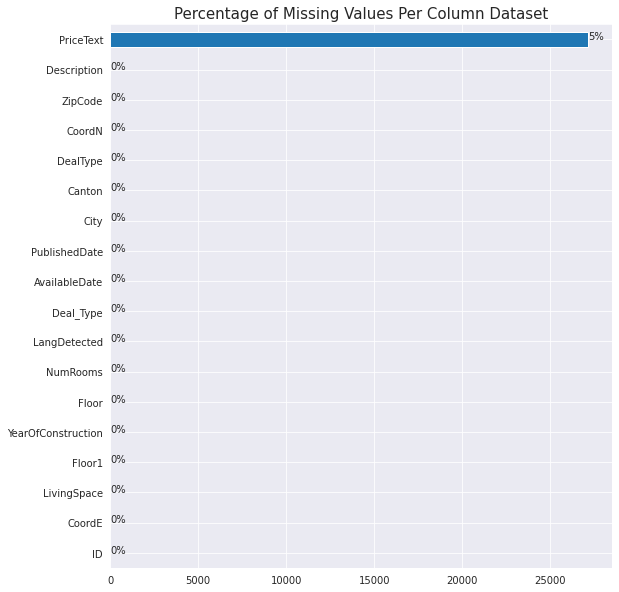

In [71]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [72]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

0        1050
1        4048
2        1061
3        2250
4     2150000
Name: PriceText, dtype: object

In [73]:
data['PriceText'].value_counts()

 1500     5943
 1200     5004
 1400     4784
 1300     4633
 1600     4617
          ... 
 6717        1
 11575       1
 8895        1
 4785        1
 6655        1
Name: PriceText, Length: 9146, dtype: int64

In [74]:
data['PriceText'] = data['PriceText'].replace('EUR','', regex = True)
data['PriceText'].head()

0        1050
1        4048
2        1061
3        2250
4     2150000
Name: PriceText, dtype: object

In [75]:
data['PriceText'].dtype

dtype('O')

In [76]:
data['PriceText'].value_counts()

 1500     5944
 1200     5005
 1400     4785
 1300     4633
 1600     4617
          ... 
 17762       1
 88042       1
 15605       1
 8964        1
 6655        1
Name: PriceText, Length: 9025, dtype: int64

In [77]:
data['PriceText'] = data['PriceText'].apply(pd.to_numeric)

In [78]:
data['PriceText'].dtype

dtype('float64')

In [79]:
data['PriceText'].describe()

count       555514.00000
mean        351492.21821
std        4209334.86779
min              1.00000
25%           1200.00000
50%           1800.00000
75%         310000.00000
max     1500000000.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

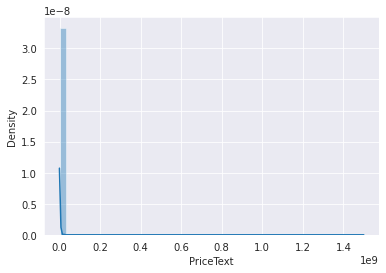

In [80]:
sns.distplot(data['PriceText'])

<AxesSubplot:xlabel='PriceText'>

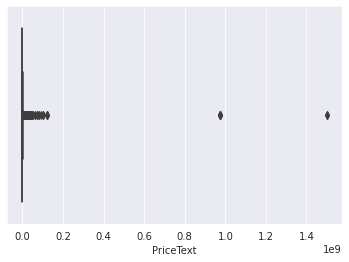

In [81]:
sns.boxplot(data['PriceText'])

In [82]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [83]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [14500000.0, 16950000.0, 25000000.0, 13000000.0, 24500000.0, 14000000.0, 16000000.0, 14000000.0, 15000000.0, 49000000.0, 14900000.0, 15900000.0, 49500000.0, 26109661.0, 13237000.0, 23185825.0, 13900000.0, 22200000.0, 18000000.0, 14000000.0, 15000000.0, 49500000.0, 25000000.0, 13500000.0, 14000000.0, 30000000.0, 13500000.0, 49500000.0, 26000000.0, 16950000.0, 25000000.0, 15000000.0, 13500000.0, 19950000.0, 14000000.0, 17500000.0, 16950000.0, 16200000.0, 20000000.0, 25000000.0, 14900000.0, 15250000.0, 15000000.0, 14000000.0, 26500000.0, 49500000.0, 20000000.0, 14000000.0, 14000000.0, 49500000.0, 16900000.0, 22000000.0, 49500000.0, 22090000.0, 16950000.0, 32500000.0, 16950000.0, 16900000.0, 14450000.0, 25215000.0, 34000000.0, 32500000.0, 22000000.0, 49500000.0, 39000000.0, 17000000.0, 20000000.0, 40000000.0, 90000000.0, 37000000.0, 45000000.0, 62000000.0, 20000000.0, 75000000.0, 17000000.0, 13500000.0, 60000000.0, 19000000.0, 22000000.0, 13000000.0, 2000000

Since, PriceText contains outliers, drop the rows

In [84]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [85]:
data['PriceText'].describe()

count     555209.00000
mean      324747.62023
std       816841.63997
min            1.00000
25%         1200.00000
50%         1800.00000
75%       300000.00000
max     12923475.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

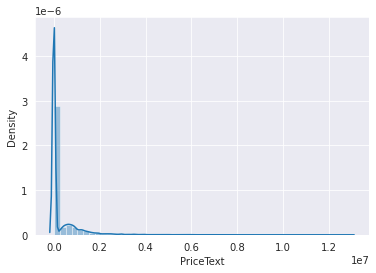

In [86]:
sns.distplot(data['PriceText'])

In [87]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [88]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [89]:
data["PriceText"].describe()

count    543999.00000
mean     238603.72275
std      494815.31277
min           1.00000
25%        1200.00000
50%        1780.00000
75%       79000.00000
max     2775000.00000
Name: PriceText, dtype: float64

<AxesSubplot:xlabel='PriceText'>

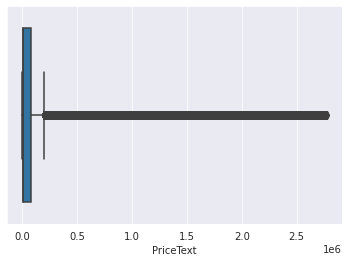

In [90]:
sns.boxplot(data['PriceText'])

Text(0.5, 0, 'Sample')

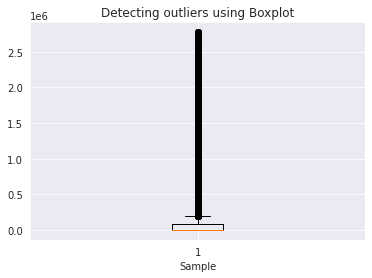

In [91]:
plt.boxplot(data["PriceText"])
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

<AxesSubplot:xlabel='PriceText', ylabel='Density'>

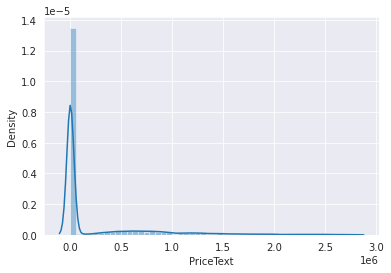

In [92]:
sns.distplot(data['PriceText'])

**Encoding the categorical column [''City''] with the target column**

In [93]:
City.shape, data['PriceText'].shape, data['City'].shape

((582669, 1), (543999,), (543999,))

In [94]:
City = data['City'].copy()

In [95]:
City.shape, data['PriceText'].shape, data['City'].shape

((543999,), (543999,), (543999,))

In [96]:
#Fit and Transform Train Data
City = encoder.fit_transform(City,data['PriceText'])

In [97]:
City.head()

,City
0,357957.89474
1,84965.45703
2,57866.50332
3,176773.61957
4,738950.66667


In [98]:
City = City.apply(pd.to_numeric)

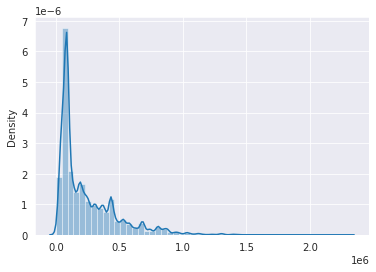

In [99]:
sns.distplot(City)
plt.show()

In [100]:
#City.skew()

In [101]:
#City.dtype

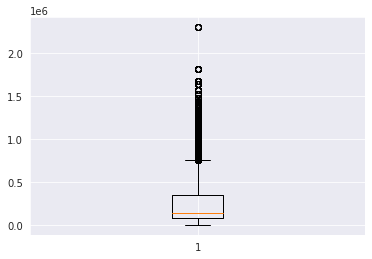

In [102]:
plt.boxplot(City)
plt.show()

In [103]:
data['City'] = City.copy()

In [104]:
data.isnull().sum()

ID                     0
DealType               0
Canton                 0
ZipCode                0
City                   0
PublishedDate          0
AvailableDate          0
PriceText              0
Description           22
LangDetected           0
NumRooms               0
Floor                  0
YearOfConstruction     0
Floor1                 0
LivingSpace            0
CoordE                 0
CoordN                 0
Deal_Type              0
dtype: int64

Dropping the description for now, Will work on it later

In [105]:
Description = data['Description'].copy()

In [106]:
data = data.drop('Description', axis = 1)

In [107]:
data.describe()

,DealType,ZipCode,City,PriceText,CoordE,CoordN
count,543999.00000,543999.00000,543999.00000,543999.00000,543999.00000,543999.00000
mean,12.54065,4803.23127,238597.69406,238603.72275,7.85618,46.81179
std,4.35335,2819.25695,227033.15003,494815.31277,2.66621,0.68566
min,10.00000,1000.00000,796.44212,1.00000,0.00000,-141.54182
25%,10.00000,1802.00000,84965.45703,1200.00000,7.05704,46.46967
50%,10.00000,6003.00000,144109.25966,1780.00000,7.98149,46.86528
75%,20.00000,6992.00000,352091.48736,79000.00000,8.64974,47.26765
max,20.00000,8967.00000,2299116.37496,2775000.00000,1078.51760,47.69496


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543999 entries, 0 to 543998
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  543999 non-null  object 
 1   DealType            543999 non-null  int64  
 2   Canton              543999 non-null  object 
 3   ZipCode             543999 non-null  float64
 4   City                543999 non-null  float64
 5   PublishedDate       543999 non-null  object 
 6   AvailableDate       543999 non-null  object 
 7   PriceText           543999 non-null  float64
 8   LangDetected        543999 non-null  object 
 9   NumRooms            543999 non-null  object 
 10  Floor               543999 non-null  object 
 11  YearOfConstruction  543999 non-null  object 
 12  Floor1              543999 non-null  object 
 13  LivingSpace         543999 non-null  object 
 14  CoordE              543999 non-null  float64
 15  CoordN              543999 non-nul

In [109]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

In [110]:
data.shape

(543999, 17)

In [111]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

### LangDetected

In [112]:
data['LangDetected'].value_counts()

de    278430
fr    167628
it     86831
en     11110
Name: LangDetected, dtype: int64

In [113]:
obj_col = []

In [114]:
obj_col.append('LangDetected')

### Canton

In [115]:
data['Canton'].head()

0    JU
1    ZH
2    ZH
3    TI
4    TI
Name: Canton, dtype: object

In [116]:
data['Canton'].value_counts()

ZH    136333
VD    121857
BE     96826
TI     96795
FR     42471
LU     39679
JU     10038
Name: Canton, dtype: int64

Run it at the later end because it will add to the number of columns and there is still plenty of work to do

In [117]:
#data = pd.get_dummies(data = data['Canton'], drop_first = True)

In [118]:
obj_col.append('Canton')

### ZipCode

In [119]:
data.ZipCode.head()

0   2954.00000
1   8053.00000
2   8902.00000
3   6830.00000
4   6818.00000
Name: ZipCode, dtype: float64

In [120]:
data.ZipCode.value_counts()

6900.00000    19108
1700.00000     7260
8400.00000     4989
1630.00000     4375
1004.00000     4244
              ...  
6904.00000        1
3003.00000        1
4543.00000        1
8522.00000        1
1313.00000        1
Name: ZipCode, Length: 1721, dtype: int64

Is this column really relevant to the model????

In [121]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

## Date_Columns

In [122]:
date_col = ['PublishedDate', 'AvailableDate']

In [123]:
data[date_col].head()

,PublishedDate,AvailableDate
0,2020-12-16,not available
1,2020-11-19,nach Vereinbarung
2,2021-01-20,sofort
3,2020-10-16,sofort
4,2020-07-17,sofort


In [124]:
data['AvailableDate'].value_counts()

nach Vereinbarung    215027
sofort                83407
By arrangement        57508
Immediately           18634
not available         17195
                      ...  
01.06.2026                1
01.11.2026                1
14.06.2022                1
01.05.2045                1
23.04.2022                1
Name: AvailableDate, Length: 692, dtype: int64

In [125]:
data['AvailableDate'].head()

0        not available
1    nach Vereinbarung
2               sofort
3               sofort
4               sofort
Name: AvailableDate, dtype: object

In [126]:
#sofort = 'right away'
#nach Vereinbarung = by arrangement

In [127]:
data['PublishedDate'].head()

0    2020-12-16
1    2020-11-19
2    2021-01-20
3    2020-10-16
4    2020-07-17
Name: PublishedDate, dtype: object

In [128]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type'],
      dtype='object')

In [129]:
data['Description'] = Description.copy()

In [130]:
data[['PublishedDate', 'AvailableDate', 'DealType', 'PriceText', 'Description']].head()

,PublishedDate,AvailableDate,DealType,PriceText,Description
0,2020-12-16,not available,10,1050.00000,Appartement avec beaucoup de charme à louer à ...
1,2020-11-19,nach Vereinbarung,10,4048.00000,Die Highlights:<br />» Gut geschnittener Büror...
2,2021-01-20,sofort,10,1061.00000,Für diese Wohnung suchen wir ein nettes Paar (...
3,2020-10-16,sofort,10,2250.00000,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...
4,2020-07-17,sofort,20,2150000.00000,"Attico mansardato, posto in elegante palazzina..."


In [131]:
data['PublishedDate'].head()

0    2020-12-16
1    2020-11-19
2    2021-01-20
3    2020-10-16
4    2020-07-17
Name: PublishedDate, dtype: object

In [132]:
AvlDate = data['AvailableDate'].copy()
PubDate = data['PublishedDate'].copy()

In [133]:
#AvlDate = pd.to_datetime(AvlDate)
AvlDate

0             not available
1         nach Vereinbarung
2                    sofort
3                    sofort
4                    sofort
                ...        
543994          Immediately
543995       By arrangement
543996       By arrangement
543997       By arrangement
543998           01.04.2022
Name: AvailableDate, Length: 543999, dtype: object

In [134]:
AvlDate.value_counts()

nach Vereinbarung    215027
sofort                83407
By arrangement        57508
Immediately           18634
not available         17195
                      ...  
01.06.2026                1
01.11.2026                1
14.06.2022                1
01.05.2045                1
23.04.2022                1
Name: AvailableDate, Length: 692, dtype: int64

In [135]:
replacement_mapping_dict = {
    "nach Vereinbarung": np.nan,
    "sofort": np.nan,
    "By arrangement": np.nan,
    "Immediately": np.nan,
    "not available": np.nan
}
AvlDate = AvlDate.replace(replacement_mapping_dict)

In [136]:
AvlDate.value_counts()

01.04.2021    12869
01.07.2021    12218
01.10.2021    11516
01.05.2021     8766
01.08.2021     8735
              ...  
18.07.2022        1
17.07.5392        1
01.01.2034        1
01.06.2026        1
23.04.2022        1
Name: AvailableDate, Length: 687, dtype: int64

In [137]:
len(data)

543999

In [138]:
(AvlDate.isnull().sum()/len(data))*100

72.01686032511088

In [139]:
#AvlDate.fillna("Others", inplace = True)

In [140]:
AvlDate.isnull().sum()

391771

In [141]:
#AvlDate = pd.to_datetime(AvlDate)

In [142]:
AvlDate.describe()

count         152228
unique           687
top       01.04.2021
freq           12869
Name: AvailableDate, dtype: object

In [143]:
percentage_missing(AvlDate)

72.01686032511088

In [144]:
AvlDate = pd.DataFrame(AvlDate)

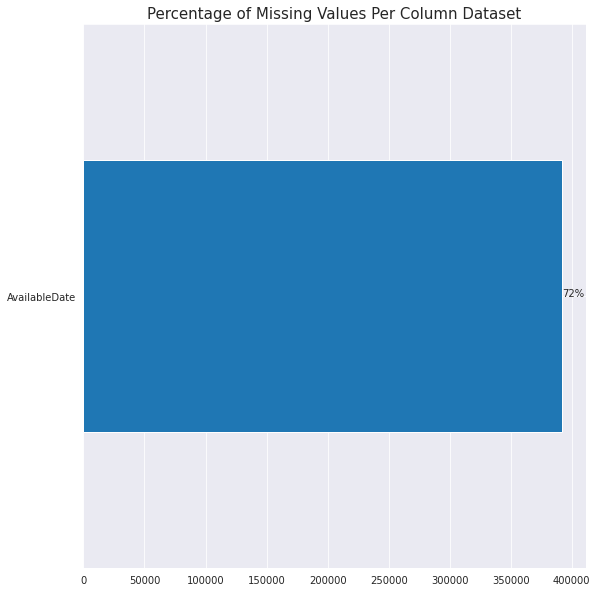

In [145]:
ax = AvlDate.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Maybe I will need to drop the avilable dates for now because of too much null value

### Pend Pend Pend Pend

### PublishedDate

In [146]:
data['PublishedDate'].head()

0    2020-12-16
1    2020-11-19
2    2021-01-20
3    2020-10-16
4    2020-07-17
Name: PublishedDate, dtype: object

In [147]:
data['PublishedDate'] = pd.to_datetime(data['PublishedDate'])

In [148]:
data['PublishedDate'].head()

0   2020-12-16
1   2020-11-19
2   2021-01-20
3   2020-10-16
4   2020-07-17
Name: PublishedDate, dtype: datetime64[ns]

In [149]:
#Extracting the year, month & day from the published datetime column

# Year
data['PublishedYear'] = data['PublishedDate'].dt.year

# Month
data['PublishedMonth'] = data['PublishedDate'].dt.month

# Day
data['PublishedDay'] = data['PublishedDate'].dt.day

## We Move to other columns again******

In [150]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type', 'Description', 'PublishedYear', 'PublishedMonth',
       'PublishedDay'],
      dtype='object')

In [151]:
NumRooms = data['NumRooms'].copy()

In [152]:
data['NumRooms'].head()

0     3.5
1    None
2       3
3      10
4     5.5
Name: NumRooms, dtype: object

In [153]:
(data.NumRooms.isnull().sum()/len(data))*100

0.0

In [154]:
data['NumRooms'].value_counts()

3.5     107356
None     92016
4.5      85927
2.5      64267
1        39604
         ...  
59           1
34.5         1
2.2          1
85           1
40           1
Name: NumRooms, Length: 75, dtype: int64

In [155]:
data['NumRooms'] = data['NumRooms'].replace('None', np.nan)
data['NumRooms'].head()

0    3.5
1    NaN
2      3
3     10
4    5.5
Name: NumRooms, dtype: object

In [156]:
data['NumRooms'] = data['NumRooms'].apply(pd.to_numeric)

In [157]:
data['NumRooms'].isnull().sum()

92016

In [158]:
percentage_missing(data['NumRooms'])

16.91473697561944

In [159]:
data['NumRooms'].value_counts()

3.50000     107356
4.50000      85927
2.50000      64267
1.00000      39604
3.00000      32410
             ...  
59.00000         1
34.50000         1
85.00000         1
2.20000          1
40.00000         1
Name: NumRooms, Length: 74, dtype: int64

In [160]:
data['NumRooms'].dtype

dtype('float64')

<AxesSubplot:xlabel='NumRooms'>

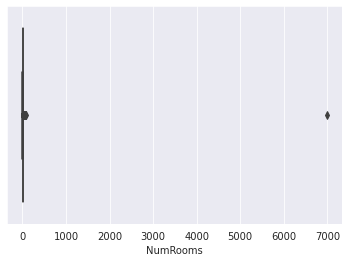

In [161]:
sns.boxplot(data['NumRooms'])

In [162]:
data['NumRooms'].describe()

count   451983.00000
mean         3.57586
std         10.53693
min          0.00000
25%          2.50000
50%          3.50000
75%          4.50000
max       6987.00000
Name: NumRooms, dtype: float64

In [163]:
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [164]:
sample_outliers = detect_outliers_zscore(data['NumRooms'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [165]:
data = data[data["NumRooms"]<min(sample_outliers)].reset_index(drop = True)

Text(0.5, 0, 'Sample')

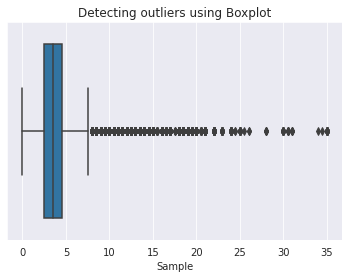

In [166]:
sns.boxplot(data['NumRooms'])
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [167]:
data['NumRooms'].describe()

count   451956.00000
mean         3.55758
std          1.72748
min          0.00000
25%          2.50000
50%          3.50000
75%          4.50000
max         35.00000
Name: NumRooms, dtype: float64

<AxesSubplot:xlabel='NumRooms', ylabel='Density'>

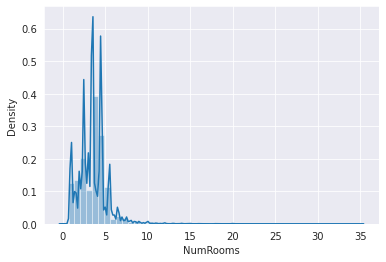

In [168]:
sns.distplot(data['NumRooms'])

In [169]:
data['NumRooms'].isnull().sum()

0

In [170]:
#data['NumRooms'].groupby()

In [171]:
percentage_missing(data['NumRooms'])

0.0

In [172]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE', 'CoordN',
       'Deal_Type', 'Description', 'PublishedYear', 'PublishedMonth',
       'PublishedDay'],
      dtype='object')

### Floor Column

In [173]:
data[['Floor', 'Floor1']].head()

,Floor,Floor1
0,not available,not available
1,3. Stock,3. Stock
2,2. Stock,2. Stock
3,3. Stock,3. Stock
4,1. Stock,1. Stock


In [174]:
data = data.drop('Floor1', axis = 1)

In [175]:
Floor = data['Floor'].copy()

In [176]:
data['Floor'].value_counts()

not available           183951
1. Stock                 70828
2. Stock                 62016
EG                       48024
3. Stock                 37271
4. Stock                 16910
5. Stock                  7852
1. floor                  5548
2. floor                  4834
6. Stock                  3596
3. floor                  2899
Untergeschoss             1775
7. Stock                  1450
4. floor                  1318
8. Stock                   728
5. floor                   651
9. Stock                   384
6. floor                   322
10. Stock                  314
11. Stock                  208
12. Stock                  186
13. Stock                  138
7. floor                   130
8. floor                    86
14. Stock                   74
15. Stock                   50
16. Stock                   44
17. Stock                   40
18. Stock                   39
9. floor                    35
10. floor                   32
30. Stock oder höher        31
19. Stoc

In [177]:
#To remove the digits from the floor column
data['Floor'] = data['Floor'].replace('\d+', '', regex = True)

In [178]:
data['Floor'].value_counts()

. Stock               202254
not available         183951
EG                     48024
. floor                15921
Untergeschoss           1775
. Stock oder höher        31
Name: Floor, dtype: int64

* untergeschoss = basement 
* Stock oder höher = floor or higher

* This is the equivalent of this words in English

In [179]:
# The replace fucntion to replace the words in german in the english format and correct the format of the incorrect value
replacement_mapping_dict = {
    ". Stock": 'Stock',
    ". floor ": 'Floor',
    "Untergeschoss": 'basement',
    ". Stock oder höher": 'floor or higher',
    "EG": 'ground floor'
}
data['Floor'] = data['Floor'].replace(replacement_mapping_dict)

In [180]:
data['Floor'].value_counts()

Stock              202254
not available      183951
ground floor        48024
Floor               15921
basement             1775
floor or higher        31
Name: Floor, dtype: int64

In [181]:
obj_col.append('Floor')

In [182]:
data[['Floor', 'NumRooms']].head()

,Floor,NumRooms
0,not available,3.50000
1,Stock,3.00000
2,Stock,10.00000
3,Stock,5.50000
4,Stock,2.50000


In [183]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Deal_Type',
       'Description', 'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

## Things to try out

* **data = data.sort_values(by=['adPublishedDate']).reset_index(drop=True)**
* Trying to sort the data by dates... 'adPublishedDate', 'adAvailableDate'
* How many days is between the published date and available date
* Extract days and month from the date columns
* Get the number of years between the year of construction and the Available Year of the house & Year of Publishing the year for an ad

### Year of Construction

In [184]:
Year = data['YearOfConstruction'].copy()

In [185]:
data['YearOfConstruction'].head()

0    not available
1    not available
2    not available
3             2012
4             1991
Name: YearOfConstruction, dtype: object

In [186]:
data['YearOfConstruction'].value_counts()

not available    274563
2021              16651
2020              11708
2022               7657
2019               7155
                  ...  
1761                  1
1718                  1
1612                  1
4                     1
1574                  1
Name: YearOfConstruction, Length: 483, dtype: int64

In [187]:
data['YearOfConstruction'] = data['YearOfConstruction'].replace('not available', 0)

In [188]:
data['YearOfConstruction'] = data['YearOfConstruction'].apply(pd.to_numeric)

In [189]:
data['YearOfConstruction'].value_counts()

0       274563
2021     16651
2020     11708
2022      7657
2019      7155
         ...  
1761         1
1718         1
1612         1
4            1
1574         1
Name: YearOfConstruction, Length: 483, dtype: int64

<AxesSubplot:xlabel='YearOfConstruction', ylabel='Density'>

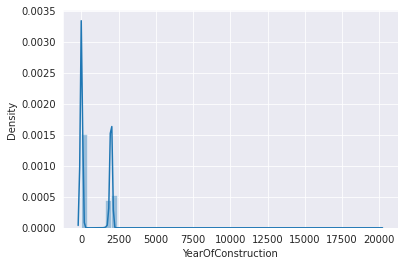

In [190]:
sns.distplot(data['YearOfConstruction'])

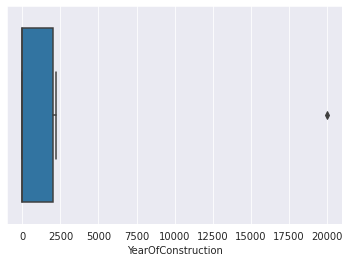

In [191]:
sns.boxplot(data['YearOfConstruction'])
plt.show()

In [192]:
data['YearOfConstruction'].describe()

count   451956.00000
mean       780.08231
std        971.60094
min          0.00000
25%          0.00000
50%          0.00000
75%       1987.00000
max      20004.00000
Name: YearOfConstruction, dtype: float64

In [193]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Deal_Type',
       'Description', 'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

In [194]:
data['YearOfConstruction'].describe()

count   451956.00000
mean       780.08231
std        971.60094
min          0.00000
25%          0.00000
50%          0.00000
75%       1987.00000
max      20004.00000
Name: YearOfConstruction, dtype: float64

In [195]:
sample_outliers = detect_outliers_zscore(data['YearOfConstruction'])

In [196]:
data = data[data["YearOfConstruction"]<min(sample_outliers)].reset_index(drop = True)

### Living Space

In [197]:
LivingSpace = data['LivingSpace'].copy()

In [198]:
data['LivingSpace'].head()

0               80
1               57
2              190
3    not available
4               60
Name: LivingSpace, dtype: object

In [199]:
data['LivingSpace'].dtype

dtype('O')

In [200]:
data['LivingSpace'].describe()

count            274574
unique              617
top       not available
freq              83698
Name: LivingSpace, dtype: object

In [201]:
data['LivingSpace'].value_counts()

not available    83698
80                6977
100               6454
70                6307
60                5787
                 ...  
338                  1
1,800                1
12,000               1
858                  1
802                  1
Name: LivingSpace, Length: 617, dtype: int64

In [202]:
data['LivingSpace'] = data['LivingSpace'].replace('not available', 0)
data['LivingSpace'].value_counts()

0         83698
80         6977
100        6454
70         6307
60         5787
          ...  
338           1
1,800         1
12,000        1
858           1
802           1
Name: LivingSpace, Length: 617, dtype: int64

In [203]:
data['LivingSpace'] = data['LivingSpace'].replace(',', '', regex=True)
data['LivingSpace'].value_counts()

0        83698
80        6977
100       6454
70        6307
60        5787
         ...  
338          1
1800         1
12000        1
858          1
802          1
Name: LivingSpace, Length: 617, dtype: int64

<AxesSubplot:xlabel='LivingSpace', ylabel='Density'>

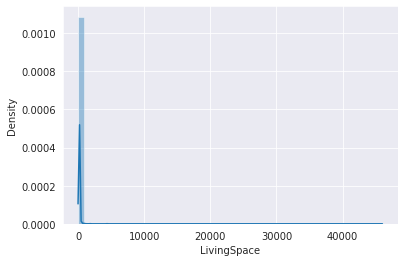

In [204]:
sns.distplot(data['LivingSpace'])

In [205]:
data['LivingSpace'] = data['LivingSpace'].apply(pd.to_numeric)

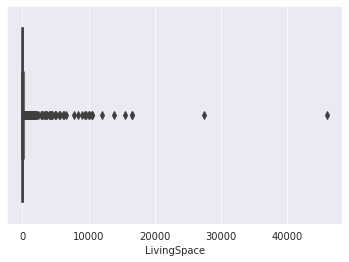

In [206]:
sns.boxplot(data['LivingSpace'])
plt.show()

In [207]:
data['LivingSpace'].describe()

count   274574.00000
mean        63.80738
std        158.61258
min          0.00000
25%          0.00000
50%         60.00000
75%         92.00000
max      46000.00000
Name: LivingSpace, dtype: float64

In [208]:
sample_outliers = detect_outliers_zscore(data['LivingSpace'])

In [209]:
#print(sample_outliers)

In [210]:
data = data[data["LivingSpace"]<min(sample_outliers)].reset_index(drop = True)

In [211]:
data['LivingSpace'].describe()

count   105447.00000
mean         5.20951
std         10.89247
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         39.00000
Name: LivingSpace, dtype: float64

In [212]:
#sample_outliers = detect_outliers_zscore(data['LivingSpace'])
#print(sample_outliers)

<AxesSubplot:xlabel='LivingSpace'>

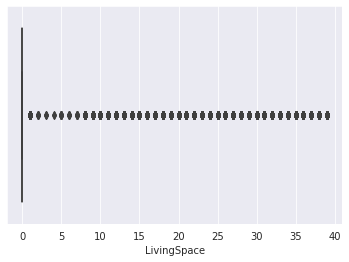

In [213]:
sns.boxplot(data['LivingSpace'])

<AxesSubplot:xlabel='LivingSpace', ylabel='Density'>

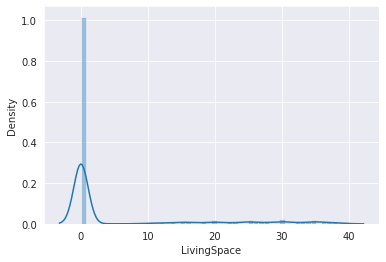

In [214]:
sns.distplot(data['LivingSpace'])

In [215]:
data['LivingSpace'].describe()

count   105447.00000
mean         5.20951
std         10.89247
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         39.00000
Name: LivingSpace, dtype: float64

In [216]:
Livingspace = data['LivingSpace'].copy()

In [217]:
Livingspace = Livingspace.apply(pd.to_numeric)
Livingspace = pd.DataFrame(Livingspace)
Livingspace.head()

,LivingSpace
0,0
1,0
2,0
3,0
4,0


In [218]:
Livingspace['LivingSpace'].head()

0    0
1    0
2    0
3    0
4    0
Name: LivingSpace, dtype: int64

In [219]:
Livingspace.shape

(105447, 1)

In [220]:
sample_outliers = detect_outliers_zscore(Livingspace['LivingSpace'])
#print(sample_outliers)

In [221]:
#data = data[data["LivingSpace"]<min(sample_outliers)].reset_index(drop = True)
Livingspace = Livingspace[Livingspace["LivingSpace"]<min(sample_outliers)].reset_index(drop = True)

In [222]:
Livingspace.shape

(104353, 1)

In [223]:
LivingSpace.shape

(274574,)

Should you fix the outliers or leave it in this scenerio???

In [224]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Deal_Type',
       'Description', 'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

#### Some Columns with outliers that you can work on maybe it would improve the model
* YearOfObservation
* LivingSpace

### Coordinates

In [225]:
data[['CoordN', 'CoordE']].head()

,CoordN,CoordE
0,46.58997,6.64002
1,47.50012,8.45490
2,46.61502,6.66426
3,47.36868,8.54439
4,47.19046,7.10679


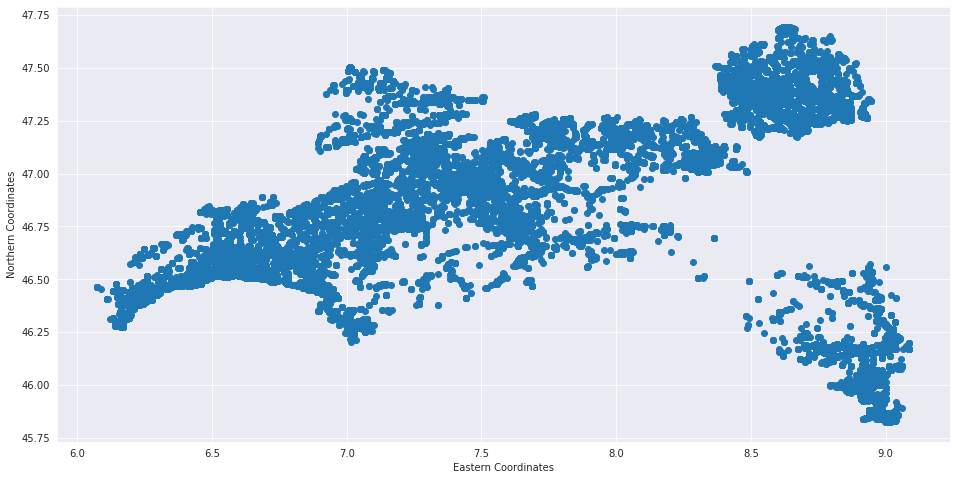

In [226]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['CoordE'], data['CoordN'])
ax.set_xlabel('Eastern Coordinates')
ax.set_ylabel('Northern Coordinates')
plt.show()

In [227]:
data[['CoordN', 'CoordE']].value_counts()

CoordN    CoordE 
47.38076  8.51729    979
46.00937  8.95078    777
46.93632  7.43613    707
47.48568  8.72929    646
47.37220  8.51625    625
                    ... 
46.85314  7.19863      1
46.85310  7.19844      1
46.85297  7.19539      1
46.85286  7.25224      1
47.69464  8.61792      1
Length: 36298, dtype: int64

In [228]:
data['CoordN'].dtype

dtype('float64')

## Final Preparation for Modelling

In [229]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Deal_Type',
       'Description', 'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

In [230]:
data[['DealType', 'Deal_Type']].head()

,DealType,Deal_Type
0,10,rental
1,10,rental
2,10,rental
3,10,rental
4,10,rental


In [231]:
target_map = {
    10: 0,
    20: 1}

In [232]:
data['DealType'].replace(target_map, inplace = True)
data['DealType'].head()

0    0
1    0
2    0
3    0
4    0
Name: DealType, dtype: int64

In [233]:
data = data.drop('Deal_Type', axis = 1)

In [234]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Description',
       'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

In [235]:
data.shape

(105447, 19)

In [236]:
obj_col

['LangDetected', 'Canton', 'Floor']

In [237]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Description',
       'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

In [238]:
drop_cols = ['ID','AvailableDate', 'Description', 'PublishedDate']

In [239]:
data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,LangDetected,NumRooms,Floor,YearOfConstruction,LivingSpace,CoordE,CoordN,Description,PublishedYear,PublishedMonth,PublishedDay
0,A100005,0,VD,1053.00000,316209.83619,2021-01-20,sofort,800.00000,fr,1.00000,not available,0,0,6.64002,46.58997,A louer local plein pied de 100m2 facile d'acc...,2021,1,20
1,A100024,0,ZH,8162.00000,211742.72396,2020-10-04,sofort,850.00000,de,1.00000,Stock,0,0,8.45490,47.50012,in Steinmaur vermieten wir verschiedene möblie...,2020,10,4
2,A10003,0,VD,1041.00000,133013.46512,2020-12-11,not available,1595.00000,fr,3.00000,Stock,0,0,6.66426,46.61502,Situé au 1er étage dans un immeuble de la camp...,2020,12,11
3,A100031,0,ZH,8001.00000,84965.45703,2020-11-19,not available,1525.00000,de,1.00000,Stock,0,0,8.54439,47.36868,Suchen Sie einen neuen Arbeitsort an renommier...,2020,11,19
4,A100033,0,BE,2607.00000,376576.00000,2020-12-14,nach Vereinbarung,1250.00000,fr,3.50000,not available,0,0,7.10679,47.19046,Magnifique appart. de 3.5 pièces - cuisine age...,2020,12,14


In [240]:
d = data.copy()

In [241]:
data = pd.get_dummies(data = data,columns = obj_col, drop_first = True)

In [242]:
data.head()

,ID,DealType,ZipCode,City,PublishedDate,AvailableDate,PriceText,NumRooms,YearOfConstruction,LivingSpace,CoordE,CoordN,Description,PublishedYear,PublishedMonth,PublishedDay,LangDetected_en,LangDetected_fr,LangDetected_it,Canton_FR,Canton_JU,Canton_LU,Canton_TI,Canton_VD,Canton_ZH,Floor_Stock,Floor_basement,Floor_floor or higher,Floor_ground floor,Floor_not available
0,A100005,0,1053.00000,316209.83619,2021-01-20,sofort,800.00000,1.00000,0,0,6.64002,46.58997,A louer local plein pied de 100m2 facile d'acc...,2021,1,20,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,A100024,0,8162.00000,211742.72396,2020-10-04,sofort,850.00000,1.00000,0,0,8.45490,47.50012,in Steinmaur vermieten wir verschiedene möblie...,2020,10,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,A10003,0,1041.00000,133013.46512,2020-12-11,not available,1595.00000,3.00000,0,0,6.66426,46.61502,Situé au 1er étage dans un immeuble de la camp...,2020,12,11,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,A100031,0,8001.00000,84965.45703,2020-11-19,not available,1525.00000,1.00000,0,0,8.54439,47.36868,Suchen Sie einen neuen Arbeitsort an renommier...,2020,11,19,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,A100033,0,2607.00000,376576.00000,2020-12-14,nach Vereinbarung,1250.00000,3.50000,0,0,7.10679,47.19046,Magnifique appart. de 3.5 pièces - cuisine age...,2020,12,14,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [243]:
#Remember this for some visualization
#count_plot = sns.catplot(x="adNumApartments.1", kind="count" ,data=data, hue="DealType")
#plt.hist(data['adNumApartments.1'])
#plt.show()

In [244]:
data.isnull().sum()

ID                       0
DealType                 0
ZipCode                  0
City                     0
PublishedDate            0
AvailableDate            0
PriceText                0
NumRooms                 0
YearOfConstruction       0
LivingSpace              0
CoordE                   0
CoordN                   0
Description              1
PublishedYear            0
PublishedMonth           0
PublishedDay             0
LangDetected_en          0
LangDetected_fr          0
LangDetected_it          0
Canton_FR                0
Canton_JU                0
Canton_LU                0
Canton_TI                0
Canton_VD                0
Canton_ZH                0
Floor_Stock              0
Floor_basement           0
Floor_floor or higher    0
Floor_ground floor       0
Floor_not available      0
dtype: int64

In [245]:
data = data.drop(columns = drop_cols, axis = 1)

In [246]:
data.shape

(105447, 26)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105447 entries, 0 to 105446
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DealType               105447 non-null  int64  
 1   ZipCode                105447 non-null  float64
 2   City                   105447 non-null  float64
 3   PriceText              105447 non-null  float64
 4   NumRooms               105447 non-null  float64
 5   YearOfConstruction     105447 non-null  int64  
 6   LivingSpace            105447 non-null  int64  
 7   CoordE                 105447 non-null  float64
 8   CoordN                 105447 non-null  float64
 9   PublishedYear          105447 non-null  int64  
 10  PublishedMonth         105447 non-null  int64  
 11  PublishedDay           105447 non-null  int64  
 12  LangDetected_en        105447 non-null  uint8  
 13  LangDetected_fr        105447 non-null  uint8  
 14  LangDetected_it        105447 non-nu

In [248]:
data.describe()

,DealType,ZipCode,City,PriceText,NumRooms,YearOfConstruction,LivingSpace,CoordE,CoordN,PublishedYear,PublishedMonth,PublishedDay,LangDetected_en,LangDetected_fr,LangDetected_it,Canton_FR,Canton_JU,Canton_LU,Canton_TI,Canton_VD,Canton_ZH,Floor_Stock,Floor_basement,Floor_floor or higher,Floor_ground floor,Floor_not available
count,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000,105447.00000
mean,0.07151,4647.04966,185659.11921,56852.09120,2.68539,0.00028,5.20951,7.78242,46.89388,2020.87409,6.28410,15.26500,0.03827,0.29728,0.10764,0.07468,0.03054,0.07296,0.11594,0.20763,0.26521,0.37347,0.00595,0.00003,0.09226,0.50291
std,0.25768,2784.64885,182290.73503,255328.46903,1.71559,0.05431,10.89247,0.83746,0.45451,0.57046,3.58594,8.64283,0.19184,0.45706,0.30992,0.26288,0.17206,0.26007,0.32015,0.40561,0.44145,0.48373,0.07688,0.00533,0.28940,0.49999
min,0.00000,1000.00000,796.44212,1.00000,0.00000,0.00000,0.00000,6.07510,45.82494,2011.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,1816.00000,83826.96041,900.00000,1.00000,0.00000,0.00000,7.07657,46.53170,2021.00000,3.00000,8.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,3512.00000,86273.12012,1300.00000,2.50000,0.00000,0.00000,7.62212,46.95390,2021.00000,6.00000,15.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,0.00000,8003.00000,247475.31181,1760.00000,3.50000,0.00000,0.00000,8.54690,47.34041,2021.00000,9.00000,23.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
max,1.00000,8955.00000,1672326.08656,2760000.00000,31.00000,16.00000,39.00000,9.08670,47.69464,2022.00000,12.00000,31.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Modelling

In [249]:
y = data['PriceText']
X = data.drop(['PriceText'], axis = 1)

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((84357, 25), (84357,), (21090, 25), (21090,))

In [251]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [252]:
#Initialize the model
lr = LinearRegression()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
ctb = CatBoostRegressor(silent=True)
lgb = LGBMRegressor(n_estimators=4000, learning_rate=0.1, subsample=0.3, max_depth=-1, min_child_samples=30, colsample_bytree=1.0)

In [253]:
#train the model
lr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
rfr.fit(x_train, y_train)

xgb.fit(x_train, y_train)
ctb.fit(x_train, y_train)
lgb.fit(x_train, y_train)

LGBMRegressor(min_child_samples=30, n_estimators=4000, subsample=0.3)

In [254]:
lr_pred = lr.predict(x_test)
gbr_pred = gbr.predict(x_test)
rfr_pred = rfr.predict(x_test)
xgb_pred = xgb.predict(x_test)
ctb_pred = ctb.predict(x_test)
lgb_pred = lgb.predict(x_test)

In [255]:
lr_rms = np.sqrt(mean_squared_error(y_test, lr_pred))
gbr_rms = np.sqrt(mean_squared_error(y_test, gbr_pred))
rfr_rms = np.sqrt(mean_squared_error(y_test, rfr_pred))
xgb_rms = np.sqrt(mean_squared_error(y_test, xgb_pred))
ctb_rms = np.sqrt(mean_squared_error(y_test, ctb_pred))
lgb_rms = np.sqrt(mean_squared_error(y_test, lgb_pred))

In [256]:
lr_tr_score = lr.score(x_train, y_train)
gbr_tr_score = gbr.score(x_train, y_train)
rfr_tr_score = rfr.score(x_train, y_train)
xgb_tr_score = xgb.score(x_train, y_train)
ctb_tr_score = ctb.score(x_train, y_train)
lgb_tr_score = lgb.score(x_train, y_train)

In [257]:
lr_te_score = lr.score(x_test, y_test)
gbr_te_score = gbr.score(x_test, y_test)
rfr_te_score = rfr.score(x_test, y_test)
xgb_te_score = xgb.score(x_test, y_test)
ctb_te_score = ctb.score(x_test, y_test)
lgb_te_score = lgb.score(x_test, y_test)

In [258]:
# 'Train Score': [lr_tr_score, gbr_tr_score, rfr_tr_score, xgb_tr_score, ctb_tr_score, lgb_tr_score],
# 'Test Score': [lr_te_score, gbr_te_score, rfr_te_score, xgb_te_score, ctb_te_score, lgb_te_score]

In [259]:
dict_ = {'Algorithm':['LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'RMSE_Score':[lr_rms, gbr_rms, rfr_rms, xgb_rms, ctb_rms, lgb_rms]}

df = pd.DataFrame(dict_, index=[0,1,2,3,4,5])
df

,Algorithm,RMSE_Score
0,LinearRegression,153821.59620
1,GradientBoostingRegressor,106661.88941
2,RandomForestRegressor,73171.15358
3,XGBoost,78170.74237
4,CatBoost,78042.94480
5,LightGBM,72192.92333


In [260]:
dict1 = {'Algorithm':['LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'RMSE_Score':[lr_rms, gbr_rms, rfr_rms, xgb_rms, ctb_rms, lgb_rms],
        'Train Score': [lr_tr_score, gbr_tr_score, rfr_tr_score, xgb_tr_score, ctb_tr_score, lgb_tr_score],
        'Test Score': [lr_te_score, gbr_te_score, rfr_te_score, xgb_te_score, ctb_te_score, lgb_te_score]}

df = pd.DataFrame(dict1, index=[0,1,2,3,4,5])
df

,Algorithm,RMSE_Score,Train Score,Test Score
0,LinearRegression,153821.59620,0.64042,0.63311
1,GradientBoostingRegressor,106661.88941,0.82862,0.82359
2,RandomForestRegressor,73171.15358,0.98695,0.91698
3,XGBoost,78170.74237,0.95531,0.90525
4,CatBoost,78042.94480,0.94385,0.90556
5,LightGBM,72192.92333,0.99403,0.91918


In [261]:
errcb2=[]
y_pred_totcb2=[]
fold=StratifiedKFold(n_splits = 10)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2  = CatBoostRegressor(n_estimators = 1000, eval_metric = 'RMSE', od_wait = 200, learning_rate = 0.2,
                              bootstrap_type = 'Bernoulli' ,metric_period = 100, max_depth = 8,
                             use_best_model = True)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds = 200, verbose = 100,)
    preds=m2.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test,preds)))
    errcb2.append((np.sqrt(mean_squared_error(y_test,preds))))
    #np.sqrt(mean_squared_error(y_test, lr_pred)
    #p2 = m2.predict(df_test)
    #y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 217838.3416864	test: 217838.3416864	test1: 219889.1495138	best: 219889.1495138 (0)	total: 14.5ms	remaining: 14.5s
100:	learn: 69381.4971651	test: 69381.4971651	test1: 88282.9072658	best: 88282.9072658 (100)	total: 1.09s	remaining: 9.7s
200:	learn: 55838.1837719	test: 55838.1837719	test1: 81507.0234489	best: 81507.0234489 (200)	total: 2.14s	remaining: 8.49s
300:	learn: 47759.1784152	test: 47759.1784152	test1: 79153.3924104	best: 79141.0401950 (299)	total: 3.19s	remaining: 7.42s
400:	learn: 42518.7817510	test: 42518.7817510	test1: 77904.9537156	best: 77860.0787931 (397)	total: 4.27s	remaining: 6.38s
500:	learn: 38222.5076603	test: 38222.5076603	test1: 77230.5282258	best: 77230.5282258 (500)	total: 5.34s	remaining: 5.32s
600:	learn: 34728.6928036	test: 34728.6928036	test1: 76982.8148655	best: 76913.0386875 (594)	total: 6.42s	remaining: 4.26s
700:	learn: 31970.2840725	test: 31970.2840725	test1: 76575.3740773	best: 76483.7827783 (693)	total: 7.52s	remaining: 3.21s
800:	learn: 2946

0:	learn: 217877.9789393	test: 217877.9789393	test1: 218371.3229592	best: 218371.3229592 (0)	total: 14.1ms	remaining: 14.1s
100:	learn: 70300.9170455	test: 70300.9170455	test1: 81772.6074729	best: 81621.7581996 (99)	total: 1.1s	remaining: 9.78s
200:	learn: 57098.4939657	test: 57098.4939657	test1: 76271.3212247	best: 76271.3212247 (200)	total: 2.16s	remaining: 8.61s
300:	learn: 48438.3821583	test: 48438.3821583	test1: 73997.4660034	best: 73997.4660034 (300)	total: 3.24s	remaining: 7.51s
400:	learn: 42964.4757412	test: 42964.4757412	test1: 73466.6047511	best: 73157.1463398 (385)	total: 4.33s	remaining: 6.47s
500:	learn: 38606.5914809	test: 38606.5914809	test1: 72840.6841472	best: 72820.0141719 (471)	total: 5.44s	remaining: 5.42s
600:	learn: 34824.9386192	test: 34824.9386192	test1: 72738.9022734	best: 72573.6262235 (550)	total: 6.55s	remaining: 4.35s
700:	learn: 31872.8791015	test: 31872.8791015	test1: 72293.8662168	best: 72188.0895372 (686)	total: 7.65s	remaining: 3.26s
800:	learn: 29275

0:	learn: 217838.8501787	test: 217838.8501787	test1: 209420.8865387	best: 209420.8865387 (0)	total: 14.6ms	remaining: 14.6s
100:	learn: 70664.5791466	test: 70664.5791466	test1: 76072.3378743	best: 75987.2029366 (99)	total: 1.06s	remaining: 9.46s
200:	learn: 57503.3976623	test: 57503.3976623	test1: 70617.5339388	best: 70598.3377374 (198)	total: 2.17s	remaining: 8.61s
300:	learn: 49129.8843342	test: 49129.8843342	test1: 68361.8983576	best: 68359.3194148 (297)	total: 3.31s	remaining: 7.68s
400:	learn: 43416.7325384	test: 43416.7325384	test1: 67019.9390978	best: 66967.9320775 (387)	total: 4.4s	remaining: 6.57s
500:	learn: 38571.4803516	test: 38571.4803516	test1: 66938.3526177	best: 66814.9778348 (444)	total: 5.48s	remaining: 5.46s
600:	learn: 35218.2631424	test: 35218.2631424	test1: 66680.5374456	best: 66617.3787723 (587)	total: 6.54s	remaining: 4.34s
700:	learn: 32060.0586286	test: 32060.0586286	test1: 66318.2940916	best: 66302.7301825 (670)	total: 7.63s	remaining: 3.25s
800:	learn: 29631

0:	learn: 217631.3029871	test: 217631.3029871	test1: 217410.1294365	best: 217410.1294365 (0)	total: 13.1ms	remaining: 13s
100:	learn: 70253.3922239	test: 70253.3922239	test1: 83836.4461369	best: 83836.4461369 (100)	total: 1.08s	remaining: 9.59s
200:	learn: 56803.5644701	test: 56803.5644701	test1: 79322.2365111	best: 79322.2365111 (200)	total: 2.15s	remaining: 8.56s
300:	learn: 48638.6935268	test: 48638.6935268	test1: 77509.0669039	best: 77377.9094941 (290)	total: 3.22s	remaining: 7.48s
400:	learn: 42964.9893205	test: 42964.9893205	test1: 76802.0524445	best: 76736.3957693 (393)	total: 4.28s	remaining: 6.39s
500:	learn: 38673.3114931	test: 38673.3114931	test1: 76365.4555931	best: 76335.6142372 (499)	total: 5.37s	remaining: 5.35s
600:	learn: 34943.2939457	test: 34943.2939457	test1: 75794.0080082	best: 75794.0080082 (600)	total: 6.47s	remaining: 4.3s
700:	learn: 32197.3013431	test: 32197.3013431	test1: 75646.1787577	best: 75636.0434906 (693)	total: 7.54s	remaining: 3.22s
800:	learn: 29717.

100:	learn: 69897.1800027	test: 69897.1800027	test1: 77421.3490406	best: 77421.3490406 (100)	total: 1.18s	remaining: 10.5s
200:	learn: 57281.5389708	test: 57281.5389708	test1: 72950.7744131	best: 72950.7744131 (200)	total: 2.34s	remaining: 9.31s
300:	learn: 49580.7520444	test: 49580.7520444	test1: 70419.0852835	best: 70408.6046903 (299)	total: 3.5s	remaining: 8.14s
400:	learn: 43651.2151431	test: 43651.2151431	test1: 68903.8008256	best: 68766.2388033 (379)	total: 4.69s	remaining: 7s
500:	learn: 39262.7475251	test: 39262.7475251	test1: 68315.6627308	best: 68315.6627308 (500)	total: 5.78s	remaining: 5.75s
600:	learn: 35890.2953406	test: 35890.2953406	test1: 67580.3859094	best: 67386.5994799 (592)	total: 6.86s	remaining: 4.55s
700:	learn: 32883.4241125	test: 32883.4241125	test1: 67328.7479236	best: 67277.0532502 (688)	total: 7.95s	remaining: 3.39s
800:	learn: 30271.3832549	test: 30271.3832549	test1: 67277.3986117	best: 67146.4307474 (747)	total: 9.05s	remaining: 2.25s
900:	learn: 28222.85

0:	learn: 217119.9227845	test: 217119.9227845	test1: 225502.0020211	best: 225502.0020211 (0)	total: 13.4ms	remaining: 13.4s
100:	learn: 68647.8252585	test: 68647.8252585	test1: 91191.4544212	best: 91191.4544212 (100)	total: 1.13s	remaining: 10s
200:	learn: 56707.0749254	test: 56707.0749254	test1: 88278.7261942	best: 88261.3891980 (199)	total: 2.21s	remaining: 8.79s
300:	learn: 48620.1573749	test: 48620.1573749	test1: 85519.6274109	best: 85519.6274109 (300)	total: 3.31s	remaining: 7.69s
400:	learn: 43447.5793109	test: 43447.5793109	test1: 84466.7675631	best: 84466.7675631 (400)	total: 4.41s	remaining: 6.58s
500:	learn: 38804.5166445	test: 38804.5166445	test1: 83236.6066834	best: 83210.8304128 (497)	total: 5.51s	remaining: 5.49s
600:	learn: 35246.6510555	test: 35246.6510555	test1: 82627.7738693	best: 82541.2105526 (586)	total: 6.73s	remaining: 4.47s
700:	learn: 32215.1116026	test: 32215.1116026	test1: 82212.5484462	best: 82174.5440992 (696)	total: 7.81s	remaining: 3.33s
800:	learn: 29900

0:	learn: 217672.8241409	test: 217672.8241409	test1: 220357.3783795	best: 220357.3783795 (0)	total: 13.4ms	remaining: 13.4s
100:	learn: 69246.7979194	test: 69246.7979194	test1: 81725.3665798	best: 81725.3665798 (100)	total: 1.08s	remaining: 9.66s
200:	learn: 56715.0392391	test: 56715.0392391	test1: 76271.6974224	best: 76271.6974224 (200)	total: 2.17s	remaining: 8.63s
300:	learn: 49135.4223726	test: 49135.4223726	test1: 74349.5115777	best: 74345.4434196 (299)	total: 3.28s	remaining: 7.61s
400:	learn: 43450.7737231	test: 43450.7737231	test1: 72702.7972978	best: 72702.7972978 (400)	total: 4.37s	remaining: 6.53s
500:	learn: 39104.6033738	test: 39104.6033738	test1: 71587.0929263	best: 71587.0929263 (500)	total: 5.47s	remaining: 5.45s
600:	learn: 35524.2179764	test: 35524.2179764	test1: 70963.5952483	best: 70957.0573324 (595)	total: 6.54s	remaining: 4.34s
700:	learn: 32633.0872979	test: 32633.0872979	test1: 70409.2519290	best: 70384.0665494 (683)	total: 7.63s	remaining: 3.25s
800:	learn: 302

0:	learn: 216495.7189513	test: 216495.7189513	test1: 220498.8161297	best: 220498.8161297 (0)	total: 11.7ms	remaining: 11.7s
100:	learn: 70675.6321197	test: 70675.6321197	test1: 82241.4634336	best: 82241.4634336 (100)	total: 1.08s	remaining: 9.58s
200:	learn: 57644.2697626	test: 57644.2697626	test1: 76269.5654033	best: 76188.7996940 (198)	total: 2.15s	remaining: 8.56s
300:	learn: 49829.5783462	test: 49829.5783462	test1: 72752.3795662	best: 72752.3795662 (300)	total: 3.22s	remaining: 7.48s
400:	learn: 44212.1432100	test: 44212.1432100	test1: 71680.7320633	best: 71533.2183042 (386)	total: 4.3s	remaining: 6.42s
500:	learn: 39601.7164969	test: 39601.7164969	test1: 70358.4348337	best: 70358.4348337 (500)	total: 5.41s	remaining: 5.38s
600:	learn: 35776.5664361	test: 35776.5664361	test1: 69531.4909127	best: 69501.0431204 (588)	total: 6.5s	remaining: 4.32s
700:	learn: 32745.5544534	test: 32745.5544534	test1: 69333.9213764	best: 69227.1581610 (691)	total: 7.6s	remaining: 3.24s
800:	learn: 30290.

100:	learn: 68924.4658124	test: 68924.4658124	test1: 87572.5850876	best: 87562.0750504 (99)	total: 1.11s	remaining: 9.93s
200:	learn: 55667.3664138	test: 55667.3664138	test1: 82163.3113325	best: 82160.2009056 (197)	total: 2.19s	remaining: 8.71s
300:	learn: 48018.5295424	test: 48018.5295424	test1: 80324.2840571	best: 80324.2840571 (300)	total: 3.26s	remaining: 7.58s
400:	learn: 42530.4683376	test: 42530.4683376	test1: 79087.3561532	best: 79087.3561532 (400)	total: 4.47s	remaining: 6.68s
500:	learn: 38411.7325297	test: 38411.7325297	test1: 78141.4523261	best: 78106.8342423 (497)	total: 5.55s	remaining: 5.53s
600:	learn: 34881.9266825	test: 34881.9266825	test1: 77780.3347520	best: 77780.3347520 (600)	total: 6.62s	remaining: 4.39s
700:	learn: 32140.1943503	test: 32140.1943503	test1: 77389.1903630	best: 77345.4443536 (659)	total: 7.7s	remaining: 3.28s
800:	learn: 29983.2280863	test: 29983.2280863	test1: 77343.6411848	best: 77186.6538750 (752)	total: 8.78s	remaining: 2.18s
900:	learn: 28023.

100:	learn: 69451.4930393	test: 69451.4930393	test1: 88662.6219553	best: 88661.8780846 (99)	total: 1.09s	remaining: 9.69s
200:	learn: 56839.8097062	test: 56839.8097062	test1: 86000.5904523	best: 85968.6429651 (199)	total: 2.17s	remaining: 8.65s
300:	learn: 48528.7094413	test: 48528.7094413	test1: 84440.4182474	best: 84440.4182474 (300)	total: 3.27s	remaining: 7.59s
400:	learn: 42678.4553832	test: 42678.4553832	test1: 84248.2501043	best: 84172.8684457 (396)	total: 4.37s	remaining: 6.53s
500:	learn: 38559.9571892	test: 38559.9571892	test1: 84197.2743153	best: 84160.6719300 (492)	total: 5.46s	remaining: 5.44s
600:	learn: 35018.3378518	test: 35018.3378518	test1: 83526.7038229	best: 83523.8567251 (599)	total: 6.54s	remaining: 4.34s
700:	learn: 32166.0068302	test: 32166.0068302	test1: 83558.0258555	best: 83452.2494492 (612)	total: 7.63s	remaining: 3.25s
800:	learn: 29902.6193386	test: 29902.6193386	test1: 83677.1658596	best: 83452.2494492 (612)	total: 8.74s	remaining: 2.17s
Stopped by overfi

73836.39396937318

In [262]:
errcb2=[]
y_pred_totcb2=[]
fold=StratifiedKFold(n_splits = 10)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2  = CatBoostRegressor(n_estimators = 4000, eval_metric = 'RMSE', od_wait = 200, learning_rate = 0.1,
                              bootstrap_type = 'Bernoulli' ,metric_period = 100, max_depth = 8,
                             use_best_model = True)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds = 200, verbose = 100,)
    preds=m2.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test,preds)))
    errcb2.append((np.sqrt(mean_squared_error(y_test,preds))))
    #np.sqrt(mean_squared_error(y_test, lr_pred)
    #p2 = m2.predict(df_test)
    #y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 236196.9822151	test: 236196.9822151	test1: 238199.4988561	best: 238199.4988561 (0)	total: 14.3ms	remaining: 57.2s
100:	learn: 81336.3784484	test: 81336.3784484	test1: 93980.1650453	best: 93925.6655579 (99)	total: 1.08s	remaining: 41.8s
200:	learn: 69335.0836563	test: 69335.0836563	test1: 87434.5821623	best: 87434.5821623 (200)	total: 2.12s	remaining: 40s
300:	learn: 61749.9917599	test: 61749.9917599	test1: 84010.8041674	best: 84010.8041674 (300)	total: 3.17s	remaining: 39s
400:	learn: 56262.6343564	test: 56262.6343564	test1: 81716.8292432	best: 81716.8292432 (400)	total: 4.25s	remaining: 38.1s
500:	learn: 51532.2512965	test: 51532.2512965	test1: 80199.8853716	best: 80199.8853716 (500)	total: 5.33s	remaining: 37.2s
600:	learn: 47927.7991226	test: 47927.7991226	test1: 79042.9433207	best: 79042.1240464 (599)	total: 6.4s	remaining: 36.2s
700:	learn: 44911.2144556	test: 44911.2144556	test1: 78098.7683555	best: 78066.0574938 (698)	total: 7.46s	remaining: 35.1s
800:	learn: 42381.100

0:	learn: 236265.6589937	test: 236265.6589937	test1: 237010.7551514	best: 237010.7551514 (0)	total: 14.2ms	remaining: 56.6s
100:	learn: 81195.8184321	test: 81195.8184321	test1: 86453.8224937	best: 86453.8224937 (100)	total: 1.13s	remaining: 43.5s
200:	learn: 69005.2266508	test: 69005.2266508	test1: 80041.0613989	best: 80041.0613989 (200)	total: 2.27s	remaining: 43s
300:	learn: 61039.0724075	test: 61039.0724075	test1: 77321.1294995	best: 77321.1294995 (300)	total: 3.37s	remaining: 41.5s
400:	learn: 55513.0971452	test: 55513.0971452	test1: 74927.1198190	best: 74913.9202748 (399)	total: 4.48s	remaining: 40.2s
500:	learn: 51227.2435638	test: 51227.2435638	test1: 73663.5445736	best: 73663.5445736 (500)	total: 5.58s	remaining: 39s
600:	learn: 47712.5211127	test: 47712.5211127	test1: 73301.3429547	best: 73301.0184008 (599)	total: 6.72s	remaining: 38s
700:	learn: 44752.7175579	test: 44752.7175579	test1: 72640.1973484	best: 72640.1973484 (700)	total: 7.83s	remaining: 36.9s
800:	learn: 42042.675

0:	learn: 236647.5011206	test: 236647.5011206	test1: 229052.6973245	best: 229052.6973245 (0)	total: 12.3ms	remaining: 49.1s
100:	learn: 82826.9412490	test: 82826.9412490	test1: 82106.4943679	best: 82106.4943679 (100)	total: 1.1s	remaining: 42.3s
200:	learn: 70512.8309358	test: 70512.8309358	test1: 75396.1422353	best: 75396.1422353 (200)	total: 2.13s	remaining: 40.3s
300:	learn: 62651.3720398	test: 62651.3720398	test1: 71492.6042944	best: 71468.5201311 (299)	total: 3.19s	remaining: 39.2s
400:	learn: 56798.6442166	test: 56798.6442166	test1: 69529.7743654	best: 69529.7743654 (400)	total: 4.29s	remaining: 38.5s
500:	learn: 51990.0352925	test: 51990.0352925	test1: 68466.5063056	best: 68466.5063056 (500)	total: 5.34s	remaining: 37.3s
600:	learn: 48243.9541054	test: 48243.9541054	test1: 67803.2572305	best: 67793.2640541 (597)	total: 6.4s	remaining: 36.2s
700:	learn: 45096.2686678	test: 45096.2686678	test1: 67201.3243839	best: 67201.3243839 (700)	total: 7.47s	remaining: 35.1s
800:	learn: 42399

0:	learn: 236141.9403690	test: 236141.9403690	test1: 236592.2363756	best: 236592.2363756 (0)	total: 12.7ms	remaining: 50.9s
100:	learn: 81917.9386612	test: 81917.9386612	test1: 88678.5374421	best: 88678.5374421 (100)	total: 1.07s	remaining: 41.5s
200:	learn: 69416.5091961	test: 69416.5091961	test1: 82736.2558396	best: 82728.7485846 (199)	total: 2.12s	remaining: 40.1s
300:	learn: 61454.7813759	test: 61454.7813759	test1: 79466.7035163	best: 79466.7035163 (300)	total: 3.18s	remaining: 39s
400:	learn: 56207.0202440	test: 56207.0202440	test1: 77278.0453519	best: 77278.0453519 (400)	total: 4.21s	remaining: 37.8s
500:	learn: 52054.8179374	test: 52054.8179374	test1: 76228.1270461	best: 76228.1270461 (500)	total: 5.43s	remaining: 37.9s
600:	learn: 48462.8113320	test: 48462.8113320	test1: 75430.4000101	best: 75430.4000101 (600)	total: 6.5s	remaining: 36.7s
700:	learn: 45199.0544375	test: 45199.0544375	test1: 74637.7706807	best: 74605.5507683 (698)	total: 7.78s	remaining: 36.6s
800:	learn: 42526.

0:	learn: 236865.7633956	test: 236865.7633956	test1: 231905.6179145	best: 231905.6179145 (0)	total: 11.8ms	remaining: 47s
100:	learn: 81888.6520393	test: 81888.6520393	test1: 81767.2285158	best: 81767.2285158 (100)	total: 1.11s	remaining: 43s
200:	learn: 69958.4525964	test: 69958.4525964	test1: 75761.3693525	best: 75761.3693525 (200)	total: 2.16s	remaining: 40.8s
300:	learn: 62430.3692975	test: 62430.3692975	test1: 72792.2415152	best: 72792.2415152 (300)	total: 3.22s	remaining: 39.6s
400:	learn: 56569.6758576	test: 56569.6758576	test1: 70672.9472932	best: 70672.9472932 (400)	total: 4.28s	remaining: 38.4s
500:	learn: 52337.7258603	test: 52337.7258603	test1: 69470.2066041	best: 69430.0151424 (498)	total: 5.33s	remaining: 37.3s
600:	learn: 48477.5143817	test: 48477.5143817	test1: 68289.3550901	best: 68289.3550901 (600)	total: 6.4s	remaining: 36.2s
700:	learn: 45419.6012362	test: 45419.6012362	test1: 67682.0110981	best: 67682.0110981 (700)	total: 7.45s	remaining: 35.1s
800:	learn: 42643.38

0:	learn: 235551.4542062	test: 235551.4542062	test1: 243750.8265281	best: 243750.8265281 (0)	total: 14.8ms	remaining: 59.1s
100:	learn: 81078.2168432	test: 81078.2168432	test1: 95239.0778354	best: 95239.0778354 (100)	total: 1.05s	remaining: 40.4s
200:	learn: 68456.5407272	test: 68456.5407272	test1: 90020.0497455	best: 90020.0497455 (200)	total: 2.09s	remaining: 39.5s
300:	learn: 60496.8081187	test: 60496.8081187	test1: 87282.4172065	best: 87282.4172065 (300)	total: 3.14s	remaining: 38.6s
400:	learn: 54975.2053093	test: 54975.2053093	test1: 85649.4132126	best: 85649.4132126 (400)	total: 4.19s	remaining: 37.6s
500:	learn: 50503.7287223	test: 50503.7287223	test1: 84444.7065844	best: 84444.7065844 (500)	total: 5.42s	remaining: 37.9s
600:	learn: 46865.7405856	test: 46865.7405856	test1: 83793.3766871	best: 83793.3766871 (600)	total: 6.49s	remaining: 36.7s
700:	learn: 43850.7035861	test: 43850.7035861	test1: 82931.2871263	best: 82931.2871263 (700)	total: 7.55s	remaining: 35.5s
800:	learn: 414

0:	learn: 236105.1223542	test: 236105.1223542	test1: 238564.5198497	best: 238564.5198497 (0)	total: 11.8ms	remaining: 47.3s
100:	learn: 81722.3870182	test: 81722.3870182	test1: 89406.5841323	best: 89406.5841323 (100)	total: 1.07s	remaining: 41.5s
200:	learn: 70013.6154091	test: 70013.6154091	test1: 82401.1647666	best: 82401.1647666 (200)	total: 2.12s	remaining: 40s
300:	learn: 62441.2783900	test: 62441.2783900	test1: 79189.9138633	best: 79160.7214286 (299)	total: 3.19s	remaining: 39.2s
400:	learn: 56863.6660462	test: 56863.6660462	test1: 77204.5976663	best: 77204.5976663 (400)	total: 4.27s	remaining: 38.3s
500:	learn: 52129.7067158	test: 52129.7067158	test1: 75802.3505545	best: 75778.4036260 (497)	total: 5.37s	remaining: 37.5s
600:	learn: 48572.5404094	test: 48572.5404094	test1: 74599.5851764	best: 74599.5851764 (600)	total: 6.46s	remaining: 36.6s
700:	learn: 45612.0646393	test: 45612.0646393	test1: 73987.0242724	best: 73976.5231701 (699)	total: 7.56s	remaining: 35.6s
800:	learn: 43185

0:	learn: 235472.3169653	test: 235472.3169653	test1: 239219.5894382	best: 239219.5894382 (0)	total: 11.5ms	remaining: 46s
100:	learn: 81978.6608700	test: 81978.6608700	test1: 89855.1350014	best: 89855.1350014 (100)	total: 1.06s	remaining: 41s
200:	learn: 70021.9540204	test: 70021.9540204	test1: 82194.4795022	best: 82194.4795022 (200)	total: 2.12s	remaining: 40s
300:	learn: 62055.9124514	test: 62055.9124514	test1: 77626.4277576	best: 77626.4277576 (300)	total: 3.18s	remaining: 39.1s
400:	learn: 56349.1499083	test: 56349.1499083	test1: 75326.8170398	best: 75326.8170398 (400)	total: 4.25s	remaining: 38.2s
500:	learn: 52018.1487471	test: 52018.1487471	test1: 73228.3623283	best: 73206.5674433 (495)	total: 5.37s	remaining: 37.5s
600:	learn: 48590.7210462	test: 48590.7210462	test1: 72224.6163246	best: 72224.6163246 (600)	total: 6.44s	remaining: 36.4s
700:	learn: 45655.4566522	test: 45655.4566522	test1: 71404.1927563	best: 71404.1927563 (700)	total: 7.49s	remaining: 35.2s
800:	learn: 43012.828

0:	learn: 236375.8114720	test: 236375.8114720	test1: 235017.6484730	best: 235017.6484730 (0)	total: 13ms	remaining: 52s
100:	learn: 81337.0819726	test: 81337.0819726	test1: 93818.7750337	best: 93818.7750337 (100)	total: 1.05s	remaining: 40.7s
200:	learn: 69551.7520878	test: 69551.7520878	test1: 87338.3463548	best: 87338.3463548 (200)	total: 2.09s	remaining: 39.5s
300:	learn: 61588.1702716	test: 61588.1702716	test1: 83207.9655147	best: 83207.9655147 (300)	total: 3.15s	remaining: 38.7s
400:	learn: 56017.1250966	test: 56017.1250966	test1: 80992.0351242	best: 80992.0351242 (400)	total: 4.23s	remaining: 37.9s
500:	learn: 51577.7787451	test: 51577.7787451	test1: 80145.3836293	best: 80144.2763882 (499)	total: 5.28s	remaining: 36.9s
600:	learn: 48024.0510162	test: 48024.0510162	test1: 79463.6303716	best: 79463.6303716 (600)	total: 6.34s	remaining: 35.9s
700:	learn: 44887.8498109	test: 44887.8498109	test1: 78871.6622863	best: 78824.7618870 (698)	total: 7.41s	remaining: 34.9s
800:	learn: 42332.9

0:	learn: 236709.7980411	test: 236709.7980411	test1: 232169.6788499	best: 232169.6788499 (0)	total: 12.8ms	remaining: 51.2s
100:	learn: 81491.1791923	test: 81491.1791923	test1: 92826.2622583	best: 92808.4759473 (99)	total: 1.09s	remaining: 42.2s
200:	learn: 69271.0538452	test: 69271.0538452	test1: 88330.3990722	best: 88309.3743663 (197)	total: 2.18s	remaining: 41.2s
300:	learn: 61356.5286880	test: 61356.5286880	test1: 86547.2105655	best: 86547.2105655 (300)	total: 3.4s	remaining: 41.7s
400:	learn: 55843.5985570	test: 55843.5985570	test1: 85046.3848050	best: 85046.3848050 (400)	total: 4.79s	remaining: 43s
500:	learn: 51381.0885076	test: 51381.0885076	test1: 84315.3807716	best: 84296.9326651 (496)	total: 5.99s	remaining: 41.8s
600:	learn: 47804.2101354	test: 47804.2101354	test1: 84006.0636354	best: 83986.7682463 (598)	total: 7.08s	remaining: 40.1s
700:	learn: 44800.5723412	test: 44800.5723412	test1: 83218.5623412	best: 83185.4261520 (697)	total: 8.15s	remaining: 38.4s
800:	learn: 42262.8

73039.65976136636

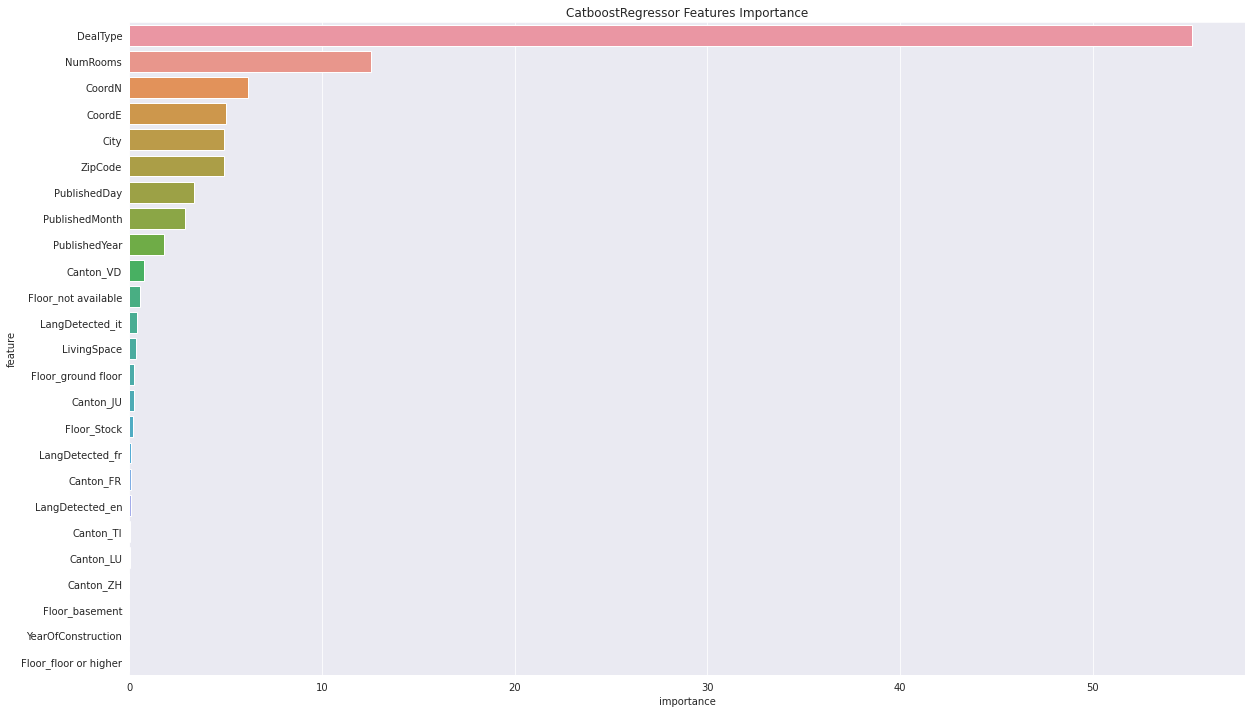

In [263]:
feature_importance_df = pd.DataFrame(m2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False))
plt.title('CatboostRegressor Features Importance');
#plt.savefig('FeatureImportance.png')

In [264]:
metric = make_scorer(mean_squared_error, greater_is_better = True)

In [265]:
gbr_cv = cross_val_score(gbr, X, y, scoring = metric, cv = 5)
gbr_cv = [np.around(i, decimals=3) for i in gbr_cv]

rfr_cv = cross_val_score(rfr, X, y, scoring = metric, cv = 5)
rfr_cv = [np.around(i, decimals=3) for i in rfr_cv]

lr_cv = cross_val_score(lr, X, y, scoring = metric, cv = 5)
lr_cv = [np.around(i, decimals=3) for i in lr_cv]

ctb_cv = cross_val_score(ctb, X, y, scoring = metric, cv = 5)
ctb_cv = [np.around(i, decimals=3) for i in ctb_cv]


xgb_cv = cross_val_score(xgb, X, y, scoring = metric, cv = 5)
xgb_cv = [np.around(i, decimals=3) for i in xgb_cv]

lgb_cv = cross_val_score(lgb, X, y, scoring = metric, cv = 5)
lgb_cv = [np.around(i, decimals=3) for i in lgb_cv]

In [266]:
gbr_cv1 = np.sqrt(gbr_cv)
rfr_cv1 = np.sqrt(rfr_cv)
lr_cv1 = np.sqrt(lr_cv)
xgb_cv1 = np.sqrt(xgb_cv)
ctb_cv1 = np.sqrt(ctb_cv)
lgb_cv1 = np.sqrt(lgb_cv)

In [267]:
gbr_cv1 = [np.around(i, decimals=3) for i in gbr_cv1]
rfr_cv1 = [np.around(i, decimals=3) for i in rfr_cv1]
lr_cv1 = [np.around(i, decimals=3) for i in lr_cv1]
xgb_cv1 = [np.around(i, decimals=3) for i in xgb_cv1]
ctb_cv1 = [np.around(i, decimals=3) for i in ctb_cv1]
lgb_cv1 = [np.around(i, decimals=3) for i in lgb_cv1]

In [268]:
dict_ = {'Algorithm': ['GradientBoostingRegressor', 'RandomForestRegressor', 'LogisticRegression', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'cv_score':[gbr_cv1, rfr_cv1, lr_cv1, xgb_cv1, ctb_cv1, lgb_cv1], 
         'cv_mean':[np.mean(gbr_cv1), np.mean(rfr_cv1), np.mean(lr_cv1), np.mean(xgb_cv1), np.mean(ctb_cv1), np.mean(lgb_cv1)], 
         'cv_std':[np.std(gbr_cv1), np.std(rfr_cv1), np.std(lr_cv1), np.std(xgb_cv1), np.std(ctb_cv1), np.std(lgb_cv1)]
        }
df = pd.DataFrame(dict_, index = [0,1,2,3,4,5])
df

,Algorithm,cv_score,cv_mean,cv_std
0,GradientBoostingRegressor,"[111912.626, 101113.564, 104664.318, 109069.06...",110001.85660,7583.11011
1,RandomForestRegressor,"[86268.141, 63476.738, 76305.314, 71763.756, 1...",79844.84560,13054.30106
2,LogisticRegression,"[151458.123, 147237.12, 149342.213, 151162.891...",153660.73960,7867.37027
3,XGBoost,"[90529.03, 68974.05, 83280.902, 77331.841, 101...",84250.61940,11015.99712
4,CatBoost,"[90118.303, 68887.301, 80007.394, 78210.095, 1...",83700.80940,11076.77752
5,LightGBM,"[86373.607, 65052.718, 77875.155, 74546.064, 1...",81426.41520,12886.43177


## Pickling the Model

In [269]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(rfr)

In [270]:
# Load the pickled model
rfr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
rfr_from_pickle.predict(X_test)

array([251930.        ,   4044.63      ,   3662.675     , ...,
          872.87428571,   1797.        ,  90000.        ])